# Basic

Basic image processing operations with OpenCV and PIL

## Index
- [Setup](#setup)
- [Loading Image](#load)
- [Display Image](#display)
- [PIL <-> cv2](#pilcv2)
- [Crop Image](#crop)

## Setup <a id="setup"></a>

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Loading Image <a id="load"></a>
Note: OpenCV return an numpy array with (B,G,R) format, PIL return an Image Object

In [7]:
def load_img_cv2 (img_path):
    return cv2.imread(img_path)


def load_img_pil (img_path):
    return Image.open(img_path)

img_cv2 = load_img_cv2('imgs/keyboard.jpg')
img_pil = load_img_pil('imgs/keyboard.jpg')

print(type(img_cv2))
print(type(img_pil))

<class 'numpy.ndarray'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>


## Display Image <a id="display"></a>

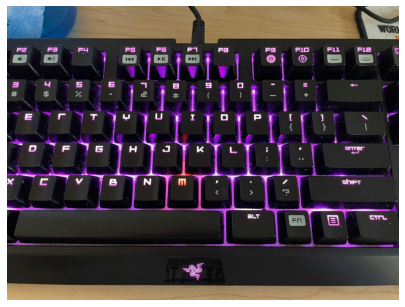

In [8]:
# Don't run this in Notebook
def display_img_cv2 (img):
    while True:
        cv2.imshow('Keyboard', img)
        if cv2.waitKey(1) == ord('q'):
            break

def display_img_mpl (img, scale=5):
    figure = plt.figure(figsize=(1.92*scale, 1.08*scale))
    ax = figure.add_subplot()
    ax.axis('off')
    ax.imshow(img)
    
img_pil = Image.open('imgs/keyboard.jpg')
display_img_mpl(img_pil)


## PIL <-> CV2 <a id='pilcv2'></a>
Convert between PIL and CV2

In [12]:
def pil2cv2 (pil_img):
    return cv2.cvtColor(np.asarray(pil_img), cv2.COLOR_RGB2BGR)


def cv22pil (cv2_array):
    return Image.fromarray(cv2.cvtColor(cv2_array, cv2.COLOR_BGR2RGB))

img_path = 'imgs/keyboard.jpg'
cv2_img = cv2.imread(img_path)
pil_img = Image.open(img_path)

print(type(pil2cv2(pil_img)))
print(type(cv22pil(cv2_img)))

<class 'numpy.ndarray'>
<class 'PIL.Image.Image'>


## Crop Image <a id='crop'></a>
Crop images. Run [Display Image](#display) before running the following cell.

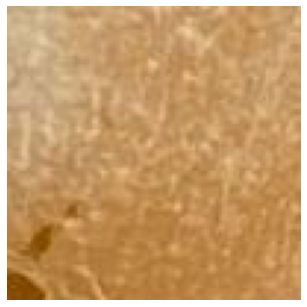

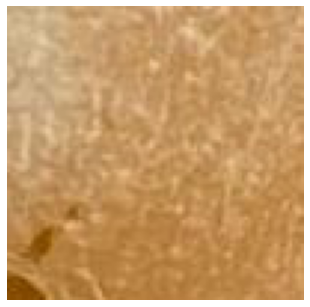

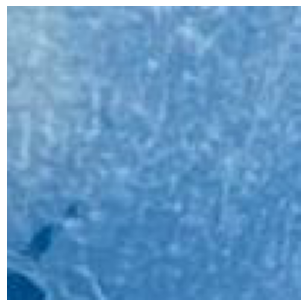

In [10]:
def crop_img_by_pixel (img, w_start, w_end, h_start, h_end):
    return img[h_start:h_end, w_start:w_end, :]


def crop_img_by_ratio (img, w_start, w_end, h_start, h_end):
    w = img.shape[1]
    h = img.shape[0]
    return img[int(h*h_start):int(h*h_end), int(w*w_start):int(w*w_end), :]


def crop_img_pil (img, w_start, w_end, h_start, h_end):
    return img.crop((w_start, h_start, w_end, h_end))


img_cv2 = cv2.imread('imgs/keyboard.jpg')
img_pil = Image.open('imgs/keyboard.jpg')

display_img_mpl(crop_img_by_pixel(img_cv2, 0, 100, 0, 100))
display_img_mpl(crop_img_by_ratio(img_cv2, 0, 0.0489, 0, 0.065))
display_img_mpl(crop_img_pil(img_pil, 0, 100, 0, 100))